In [1]:
%reload_ext autoreload 
%autoreload 2
%matplotlib inline

# **To import files from google drive**

In [2]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


# **Importing the libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.DataFrame(pd.read_csv("/content/gdrive/My Drive/TSF GRIP/Prediction using unsupervised ML/Iris.csv"))

In [5]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# From the table, we can see that Id in itself is not unique and do not form any unique significance. So we can ignore the Id column.

In [6]:
df1 = df.drop(["Id"],axis = 1)

In [7]:
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
df1['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
X = df1.iloc[:,[0,1,2,3]].values

# ***Using the Elbow method to find the optimal number of clusters***

In [10]:
from sklearn.cluster import KMeans
wcss = []  # Within cluster sum of squares
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

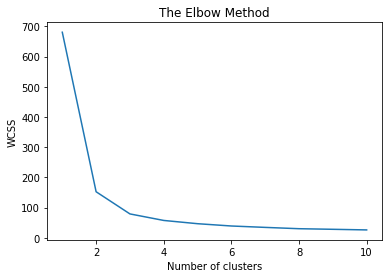

In [11]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# **Training the K-Means model**

In [12]:
model = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_means = model.fit_predict(X)

# ***Visualizing the Clusters***

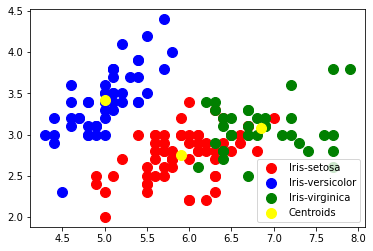

In [13]:
plt.scatter(X[y_means == 0,0], X[y_means == 0,1],  s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_means == 1,0], X[y_means == 1,1],  s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(X[y_means == 2,0], X[y_means == 2,1],  s = 100, c = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()